<a href="https://colab.research.google.com/github/maflorez08/Maira_FlorezBarreiro_KC/blob/main/taller4MairaFlorez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## > Taller 4

> maira alejandra florez barreiro






# ¿Cómo podemos controlar el creciente número de accidentes en Nueva York?

In [ ]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Obteniendo los datos relevantes

El cliente ha solicitado un análisis de la relación accidentes-área de los distritos. Los datos del municipio se almacenan en un archivo JSON en la carpeta ```datos```.

### Pregunta 

Utilice la función ```json.load()``` para cargar el archivo ```borough_data.json``` como diccionario.

**Respuesta.** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
with open('/content/drive/MyDrive/Taller4_Caso_real_NYC/Caso NYC/data/borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'brooklyn': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
 'manhattan': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
 'queens': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
 'staten island': {'area': 58.37,
  'name': 'staten island',
  'population': 479458.0},
 'the bronx': {'area': 42.1, 'name': 'the bronx', 'population': 1471160.0}}

### Pregunta 
De manera similar, use la función pandas ```read_csv()``` para cargar el archivo ```accidentes.csv``` como un DataFrame. Nombra este DataFrame ```df```.


**Respuesta.** 

In [12]:
with open('/content/drive/MyDrive/Taller4_Caso_real_NYC/Caso NYC/data/accidents.csv') as f:
  
    df=pd.read_csv(f, delimiter=';')

df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


## Overview de la data

Analizemos las columnas presentes en el data frame

In [13]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Tenemos las siguientes columnas

1. **BOROUGH**: el municipio en el que ocurrió el accidente
2. **COLLISION_ID**: un identificador único para esta colisión
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Motivos del accidente
4. **CROSS STREET NAME**: Calle transversal más cercana al lugar del accidente
5. **DATE**: Fecha del accidente
6. **TIME**: Hora del accidente
7. **LATITUDE**: Latitud del accidente
8. **LONGITUDE**: Longitud del accidente
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Lesión por categoría
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS**: Categoría muerte sabia
11. **ON STREET NAME**: Calle donde ocurrió el accidente
13. **VEHICLE TYPE CODE(1, 2, 3, 4, 5)**: Tipos de vehículos involucrados en el accidente
14. **ZIP CODE**: código postal del lugar del accidente

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando un plan de seguridad vial llamado [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). Su objetivo es reducir el número de muertes por accidentes de tránsito a *cero* para fines de 2024. El plan está creando nuevas y mejorando las medidas de seguridad actuales, algunas de ellas incluyen:

- [ ] Detección de peatones automatizada
- [ ] Auditorías de seguridad vial en lugares de alto riesgo
- [ ] Ampliación de la red de carriles bici
- [ ] Iniciativas específicas de educación y sensibilización
- [ ] Creación de islas de refugio peatonal
- [ ] Lanzamiento del programa integrado de reductor de velocidad basado en datos (topes y amortiguadores de velocidad)

¿Cuáles de estas iniciativas podrían beneficiarse directamente de un análisis de los datos proporcionados? Marque todo lo que corresponda.

**Nota:** Puede crear marcas de verificación haciendo doble clic en esta celda y agregando una ```[x]``` en las líneas correspondientes.

**Respuesta.**

- [ ] Detecciòn de peatones automatizada


- [X] Auditorías de seguridadvial en lugares de alto riesgo

- [ ] Ampliación de la red de carriles bici

- [X] Iniciativas especificas de educación y sensibilización

- [ ] Creación de islas de refugio peatonal

- [ ] Lanzamiento del programa integrado de reductor de velocidad en datos (topes y amortiguadores de velocidad)


Sigamos adelante y respondamos a cada una de las preguntas del cliente.

## Respondiendo las preguntas del cliente 

### Ejercicio 2 

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.

**Respuesta.** 

Text(0.5, 1.0, 'ACCIDENTES EN NYC')

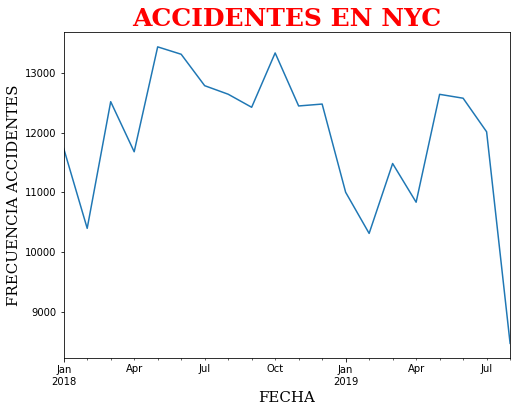

In [29]:
#GRAFICA EVOLUCION ACCIDENTES MENSUALES NYC
df['DATE']=pd.to_datetime(df['DATE'])
plt.figure(figsize=(8,6))
monthly_accidents = df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()
plt.xlabel("FECHA", fontdict={'family': 'serif', 'size': 15})
plt.ylabel("FRECUENCIA ACCIDENTES", fontdict={'family': 'serif', 'size': 15})
plt.title("ACCIDENTES EN NYC", 
          fontdict={'family': 'serif', 
                    'color' : 'RED',
                    'weight': 'bold',
                    'size': 25})

**Respuesta:**  En la grafica podemos ver que el numero de accidentes ha variado de acuerdo a los meses, en Febrero de ambos años se dan datos mas bajos  de accidentes.En Mayo, Junio y Octubre vemos cifras mas altas. 

pero podemos evidenciar que el número de accidentes en 2019 bajo comparado a 2018.

### Ejercicio 3

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**RESPUESTA**
En 2018 Y 2019 segun la grafica anterior pudimos obserbar que el mes con menos numero de accidentes es Febrero. 
segun vi en internet en este mes las calles estan llenas de nieve por el invierno , depronto las personas opten por otros medios de transporte o decidan no salir mucho de sus casas.

### Ejercicio 4 
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

**Respuesta.**

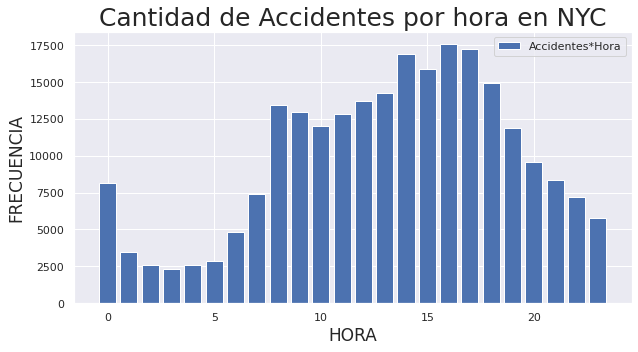

In [43]:
#Accidentes ocurridos en el dia por hora
sns.set_theme(style='darkgrid')
df['HOUR']=pd.to_datetime (df['TIME']).dt.hour
plt.figure(figsize=(10,5))
resultado=df.groupby('HOUR').size()
plt.title("Cantidad de Accidentes por hora en NYC",fontsize=25)
plt.xlabel("HORA",fontsize=17)
plt.ylabel("FRECUENCIA",fontsize=17)
plt.bar(resultado.index,resultado.values,label='Accidentes*Hora')
plt.legend()
plt.show()

en un día el número de accidentes es mayor a las 15 horas debe ser una hora de mayor movilidad  ya que vemos como va bajando a llegar a la noche tal vez por la cogestion vehicular se presenta un aumento a la media noche y una baja considerable en la siguiente hora.

### Ejercicio 5 

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Respuesta.** 


la hora es un factor importante pero para un analisis mas eficaz seria mejor tener informacion de :


*   el periodo de tiempo
*   los lugares 

para saber que lugares presentan mayor accidentes y insvestigar la razon de ello(puden haber razones de infraestructura entre otras)
y el periodo de tiempo tal vez los tiempos festivos creen mayor congestion vehicular o el clima de ciertos mese afecte.
de esta manera se pueden crear medidas para solucionar la accidentabilidad



### Ejercicio 6 

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

**Respuesta.**

Text(0, 0.5, 'FRECUENCIA')

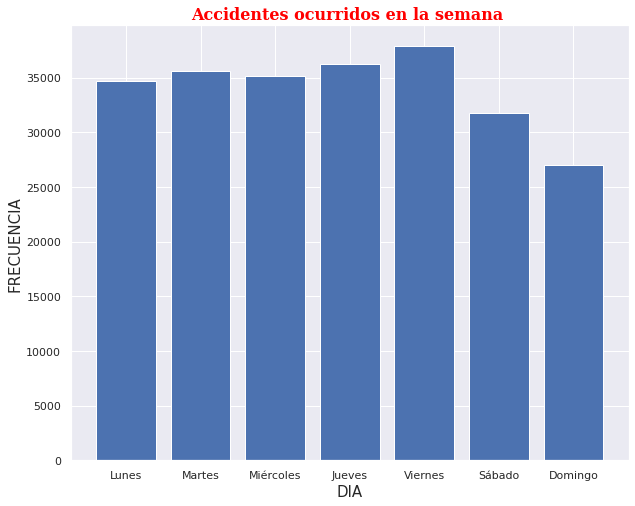

In [76]:
#accidentes ocurridos en el dia por semana
df['SEMANA']=pd.to_datetime(df['DATE']).dt.weekday
plt.figure(figsize=(10,8))
plt.bar(resultado.index,resultado.values,label='Accidentes en la semana')
plt.title("Accidentes ocurridos en la semana ",fontsize=16 ,fontdict={'family': 'serif',  'color' : 'red', 'weight': 'bold','size': 16})
plt.xticks([0,1,2,3,4,5,6],['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.xlabel("DIA",fontsize=15)
plt.ylabel("FRECUENCIA",fontsize=15)

el dia de la semana con mayor numero de accidentes es el Viernes y el dia con menor  numero de accidentes el Domingo. 


*   Lunes a Viernes las frecuencias no hay mucha diferencia y se ven mas accidentes(tal vez hay mas movilidad por las jornadas laborales)
*   domingo a sabado hay menos accidentes(tal vez hay menos movilidad ya que las personas se encuentran descansado en sus casa del trabajo)



### Ejercicio 7

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

**Respuesta.**

In [77]:
borough_data

{'brooklyn': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
 'manhattan': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
 'queens': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
 'staten island': {'area': 58.37,
  'name': 'staten island',
  'population': 479458.0},
 'the bronx': {'area': 42.1, 'name': 'the bronx', 'population': 1471160.0}}

Text(0, 0.5, 'NUMERO ACCIDENTES')

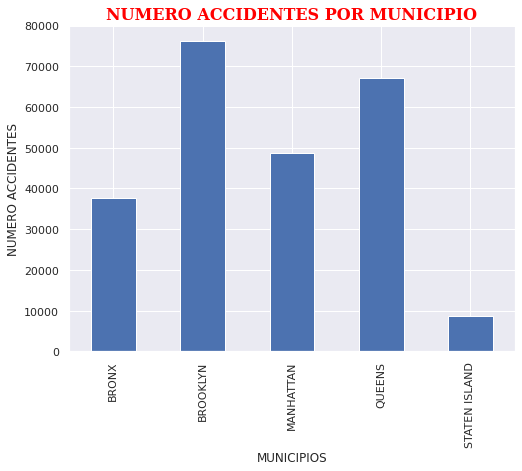

In [84]:
Borough_1=df.groupby(['BOROUGH']).size()
plt.figure(figsize=(8,6))
Borough_1.plot.bar(label='NUMERO DE ACCIDENTES')
plt.title("NUMERO ACCIDENTES POR MUNICIPIO",fontsize=16 ,fontdict={'family': 'serif',  'color' : 'red', 'weight': 'bold','size': 16})
plt.xlabel('MUNICIPIOS')
plt.ylabel('NUMERO ACCIDENTES')


el municipio con mayor cantidad de accidentes es Brooklyn y el de menor Staten Island


### Ejercicio 8 

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

**Respuesta.**

<Figure size 1080x576 with 0 Axes>

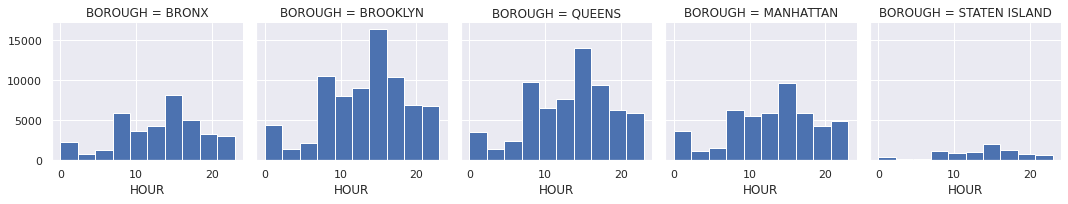

In [97]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
g = sns.FacetGrid(df, col="BOROUGH")
g.map(plt.hist, "HOUR")


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**


Hora a la que se presenta mayor cantidad de accidente EN EL INTERVALO DE 10-20

### Ejercicio 9 

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

**Respuesta**.


In [99]:
factores=df.groupby(['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']).size()
factores.reset_index()

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,0
0,BRONX,Accelerator Defective,Unspecified,Unspecified,Unspecified,Unspecified,1
1,BRONX,Aggressive Driving/Road Rage,Unspecified,Unspecified,Unspecified,Unspecified,3
2,BRONX,Alcohol Involvement,Other Vehicular,Other Vehicular,Other Vehicular,Other Vehicular,1
3,BRONX,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,17
4,BRONX,Backing Unsafely,Unspecified,Unspecified,Unspecified,Unspecified,5
...,...,...,...,...,...,...,...
192,STATEN ISLAND,Passing or Lane Usage Improper,Unspecified,Unspecified,Unspecified,Unspecified,1
193,STATEN ISLAND,Reaction to Uninvolved Vehicle,Unspecified,Unspecified,Unspecified,Unspecified,1
194,STATEN ISLAND,Turning Improperly,Unspecified,Unspecified,Unspecified,Unspecified,1
195,STATEN ISLAND,Unsafe Speed,Unspecified,Unspecified,Unspecified,Unspecified,4


### Ejercicio 10 

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

**Respuesta.** 

In [101]:

vehiculo=df.groupby(['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'], as_index = False)
vehiculo.size()

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,size
0,Ambulance,Bus,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,1
1,Ambulance,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Box Truck,1
2,BU,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,1
3,Box Truck,Pick-up Truck,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,1
4,Box Truck,Sedan,PK,Sedan,Sedan,1
...,...,...,...,...,...,...
265,Van,Sedan,Taxi,Sedan,Tractor Truck Diesel,1
266,Van,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Sedan,1
267,bus,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,1
268,tract,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,1
